In [ ]:
import pandas as pd
import numpy as np

## Load data from csv file

In [ ]:
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                header=None, names=names , delim_whitespace = True, na_values='?')

"""
Attribute Information:
    1.  CRIM      per capita crime rate by town
    2.  ZN        proportion of residential land zoned for lots over 
                  25,000 sq.ft.
    3.  INDUS     proportion of non-retail business acres per town
    4.  CHAS      Charles River dummy variable (= 1 if tract bounds 
                  river; 0 otherwise)
    5.  NOX       nitric oxides concentration (parts per 10 million)
    6.  RM        average number of rooms per dwelling
    7.  AGE       proportion of owner-occupied units built prior to 1940
    8.  DIS       weighted distances to five Boston employment centres
    9.  RAD       index of accessibility to radial highways
    10. TAX       full-value property-tax rate per $10,000
    11. PTRATIO   pupil-teacher ratio by town
    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town
    13. LSTAT     % lower status of the population
    14. MEDV      Median value of owner-occupied homes in $1000's
"""



"\nAttribute Information:\n    1.  CRIM      per capita crime rate by town\n    2.  ZN        proportion of residential land zoned for lots over \n                  25,000 sq.ft.\n    3.  INDUS     proportion of non-retail business acres per town\n    4.  CHAS      Charles River dummy variable (= 1 if tract bounds \n                  river; 0 otherwise)\n    5.  NOX       nitric oxides concentration (parts per 10 million)\n    6.  RM        average number of rooms per dwelling\n    7.  AGE       proportion of owner-occupied units built prior to 1940\n    8.  DIS       weighted distances to five Boston employment centres\n    9.  RAD       index of accessibility to radial highways\n    10. TAX       full-value property-tax rate per $10,000\n    11. PTRATIO   pupil-teacher ratio by town\n    12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blocks by town\n    13. LSTAT     % lower status of the population\n    14. MEDV      Median value of owner-occupied homes in $1000's\n"

In [ ]:
print ('df is an object of ', type(df))
print ('\n')
print(df.shape)
df.head(5)

df is an object of  <class 'pandas.core.frame.DataFrame'>


(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Store values in the pandas dataframe as numpy arrays
- we want to use the average number of rooms to predict the housing price
- we need to extract the data from df and convert them to numpy arrays

In [ ]:
y = df['PRICE'].values
x = df['RM'].values
print ('both x and y are now objects of', type(x))

both x and y are now objects of <class 'numpy.ndarray'>


### Plot the housing price against the average number of rooms

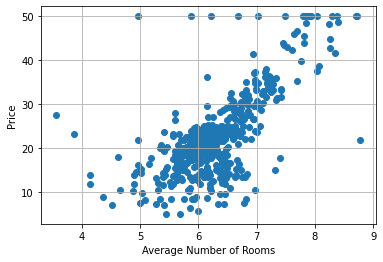

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Price')
plt.grid()

# Guess a line to fit the data

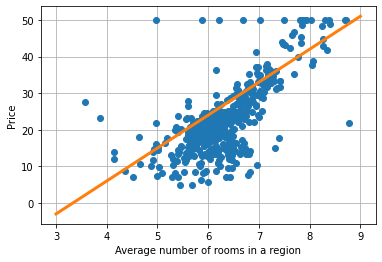

In [ ]:
w1 = 9
w0 = -30
xplt = np.linspace(3,9,100)
yplt = w1 * xplt + w0
plt.plot(x,y,'o')    # Plot the data points

plt.plot(xplt,yplt,'-',linewidth=3)  # Plot the line
plt.xlabel('Average number of rooms in a region')
plt.ylabel('Price')
plt.grid()


## Calculate the Mean Squared Error (MSE) and Mean Absolute Error (MAE) to determine goodness of fit

### Reminder :

Given :
- a dataset : $(x_i, y_i)$, $i = 1, 2, 3, ..., N$
- a model : $\hat{y} = w_1x + w_0$

We can compute the following two error functions :
- Mean Squared Error: $\displaystyle MSE = \frac{1}{N}\sum_{i=1}^N || y_i - \hat{y_i}||^2$
- Mean Absolute Error: $\displaystyle MAE = \frac{1}{N}\sum_{i=1}^N |y_i - \hat{y_i}|$

In [ ]:
x = df['RM'].values
y = df['PRICE'].values

# Huaijiang's guess
w1 = 9
w0 = -30

yhat = w1*x + w0
MSE = np.mean((yhat - y) ** 2)
MAE = np.mean(np.abs(yhat - y))
print (f'MSE: {MSE}, MAE: {MAE}')

# Divya's guess
w1 = 11
w0 = -45

yhat = w1*x + w0
MSE = np.mean((yhat - y) ** 2)
MAE = np.mean(np.abs(yhat - y))
print (f'MSE: {MSE}, MAE: {MAE}')

MSE: 59.83774942094861, MAE: 5.807100790513834
MSE: 47.929388709486155, MAE: 4.6492391304347835


### Compute the optimal values of $w_0, w_1$ using the following formulas
- $w_1=\frac{\sigma_{xy}}{\sigma_x^2}$ and $w_0=\bar{y} - w_1\bar{x}$
- $\begin{bmatrix} w_0 \\ w_1 \end{bmatrix} = (X^TX)^{-1}X^TY$

### Compare the results to verify they are equivalent
### Compute the MSE and MAE for the optimal $w_0, w_1$ on the given dataset.

In [ ]:
## Your code here
x = df['RM'].values

mean_x = np.mean(x)
mean_y = np.mean(y)

var_x = np.var(x)
covxy = np.mean((x-mean_x)*(y-mean_y))

''' 
Alternatively, use np.cov(x, y)
This function omputes the covariance matrix. 
More details can be found here https://numpy.org/doc/stable/reference/generated/numpy.cov.html
'''
covxy = np.cov(x, y)
''' 
The diagonal elements of this covariance matrix are respectivly the variance of x and the variance of y; 
The off-diagonals are the covariance of x and y.
M[i, j] returns element at the i-th row and j-th column of the matrix M.
'''
covxy = covxy[0, 1]

w1 = covxy/var_x
w0 = mean_y - w1*mean_x

print ("w0:", w0)
print ("w1:", w1)

w0: -34.67062077643857
w1: 9.10210898118031


In [ ]:
x = df['RM'].values
np.ones((x.shape[0], 1))

In [ ]:
x = df['RM'].values
bias_term = np.ones((x.shape[0], 1))
X = np.hstack([bias_term, x.reshape(-1, 1)])
# pseudo-inverse
w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose().dot(y))

print ("w0:", w[0])
print ("w1:", w[1])

w0: -34.67062077643459
w1: 9.102108981179697


MSE:  43.60055177116956
MAE:  4.4477729015322325


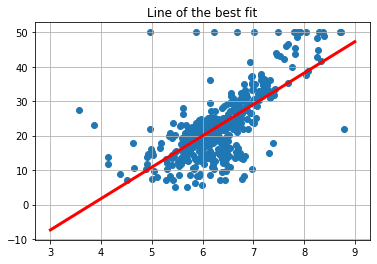

In [ ]:
xplt = np.linspace(3,9,100)
yplt = w0 + w1*xplt

plt.plot(xplt, yplt, c='red', linewidth = 3)
plt.scatter(x, y)
plt.grid()
plt.title('Line of the best fit')

yhat = w0 + w1*x
MSE = np.mean((y - yhat)**2)
MAE = np.mean(np.abs(y - yhat))
print('MSE: ', MSE)
print('MAE: ', MAE)